In [1]:
from pandas import read_csv
df = read_csv("C:/Users/Admin/Documents/Datasets/Cars93.csv")
df.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             93 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [6]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=3)
df_1 = df[["Price", "MPG.city"]]
model = agc.fit(df_1)
model.labels_

array([0, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 2], dtype=int64)

In [10]:
colors = []
for i in model.labels_:
    if i == 0:
        colors.append("Blue")
    elif i == 1:
        colors.append("Orange")
    else:
        colors.append("Red")

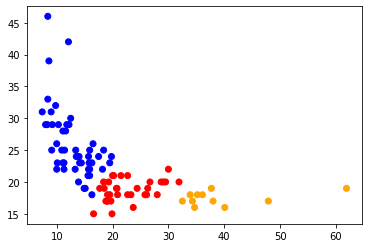

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df_1.Price, df["MPG.city"], c=colors)
plt.show()

In [12]:
import scipy.spatial as sp
dist_matrix = sp.distance_matrix(df_1.values, df_1.values)
dist_matrix

array([[ 0.        , 19.31320792, 14.11523999, ..., 10.18626526,
         7.88923317, 11.90126044],
       [19.31320792,  0.        ,  5.2       , ..., 10.6       ,
        11.59482643,  7.47261668],
       [14.11523999,  5.2       ,  0.        , ...,  6.13514466,
         6.4776539 ,  2.4       ],
       ...,
       [10.18626526, 10.6       ,  6.13514466, ...,  0.        ,
         3.05941171,  3.94461658],
       [ 7.88923317, 11.59482643,  6.4776539 , ...,  3.05941171,
         0.        ,  4.12310563],
       [11.90126044,  7.47261668,  2.4       , ...,  3.94461658,
         4.12310563,  0.        ]])

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(dist_matrix)
linkage_matrix

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


array([[ 25.        ,  65.        ,   0.70695533,   2.        ],
       [  6.        ,  70.        ,   0.79106629,   2.        ],
       [ 17.        ,  93.        ,   1.4113415 ,   3.        ],
       [ 13.        ,  60.        ,   1.47137364,   2.        ],
       [  5.        ,  33.        ,   1.50218124,   2.        ],
       [ 36.        ,  89.        ,   1.57531594,   2.        ],
       [ 23.        ,  73.        ,   1.58848244,   2.        ],
       [ 43.        ,  52.        ,   2.2399395 ,   2.        ],
       [ 14.        ,  26.        ,   2.24303796,   2.        ],
       [ 59.        ,  71.        ,   2.30276658,   2.        ],
       [ 27.        ,  62.        ,   2.58971265,   2.        ],
       [ 28.        ,  63.        ,   2.60544058,   2.        ],
       [ 55.        ,  69.        ,   2.93546019,   2.        ],
       [ 53.        ,  78.        ,   3.4006029 ,   2.        ],
       [  2.        ,  77.        ,   3.60306835,   2.        ],
       [ 21.        , 107

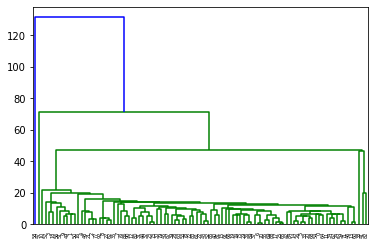

In [17]:
dendrogram(linkage_matrix)
plt.show()

In [26]:
# Looking at only few samples
df_1 = df[["Price", "MPG.city"]][1:30]
model = agc.fit(df_1)
model.labels_

array([2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0], dtype=int64)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


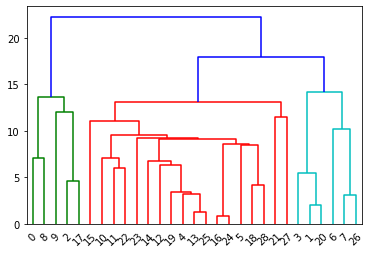

In [27]:
dist_matrix = sp.distance_matrix(df_1.values, df_1.values)
linkage_matrix = linkage(dist_matrix)
dendrogram(linkage_matrix)
plt.show()